In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: April 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

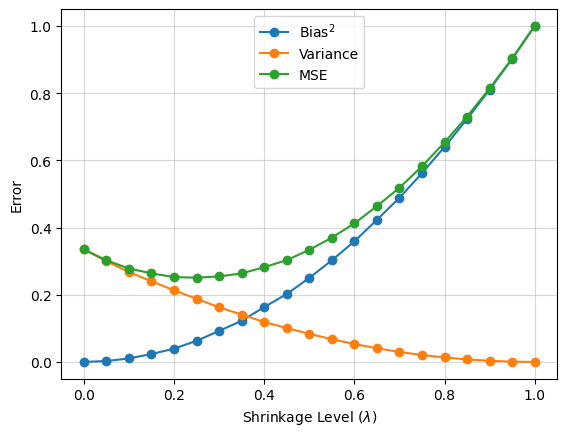

In [3]:
n_sims = 50_000         # Number of simulations
n = 3                   # Sample size per simulation
theta = np.array([1.0]) # True mean
sigma = 1.0             # Noise std
alphas = np.linspace(0, 1, 21)  # Shrinkage parameters

# Containers for results
bias_sq = []
variance = []
mse = []

# Simulation over various shrinkage levels
for alpha in alphas:
    # Generate samples: X ~ N(theta, sigma^2), shape = (n_sims, n)
    X = np.random.normal(loc=theta, scale=sigma, size=(n_sims, n))
    
    # Compute sample means: shape = (n_sims, 1)
    sample_means = np.mean(X, axis=1, keepdims=True)
    
    # Shrinkage estimator: (1-alpha)*sample_mean
    X_shrunk = (1 - alpha) * sample_means
    
    # Empirical estimates across the n_sims draws 
    mean_estimator = np.mean(X_shrunk, axis=0)  # shape = (1,)
    
    # Bias^2
    bias_vector = mean_estimator - theta
    bias_sq_value = np.mean(bias_vector**2)
    
    # Variance
    centered = X_shrunk - mean_estimator
    var_value = np.mean(np.sum(centered**2, axis=1))
    
    # MSE
    diff = X_shrunk - theta
    mse_value = np.mean(np.sum(diff**2, axis=1))
    
    bias_sq.append(bias_sq_value)
    variance.append(var_value)
    mse.append(mse_value)

# Plot results
plt.plot(alphas, bias_sq, marker='o', label='$\\mathrm{Bias}^2$')
plt.plot(alphas, variance, marker='o', label='Variance')
plt.plot(alphas, mse, marker='o', label='MSE')
plt.xlabel('Shrinkage Level ($\\lambda$)')
plt.ylabel('Error')
plt.legend(loc='upper center')
plt.grid(alpha=0.5)
plt.savefig('figures/bias_variance_tradeoff.pdf')